In [257]:
from PIL import Image, ImageFont, ImageDraw
from skimage.io import imread, imshow, show
from scipy.ndimage import affine_transform
import matplotlib.image as mpimg
import matplotlib.pylab as plt
import numpy as np
import cv2
from skimage.color import rgb2gray
from skimage.feature import canny
from scipy import ndimage as ndi
from skimage import morphology

26656_RioSebastian_Question1

2121 1414 RGB JPEG


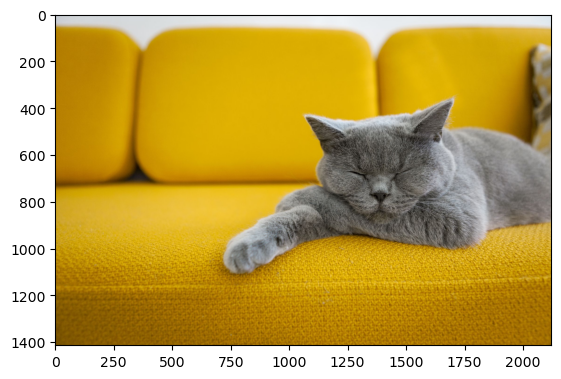

In [124]:
img1 = Image.open("midterm_1.jpeg")
plt.imshow(img1)
print (img1.width, img1.height, img1.mode, img1.format)

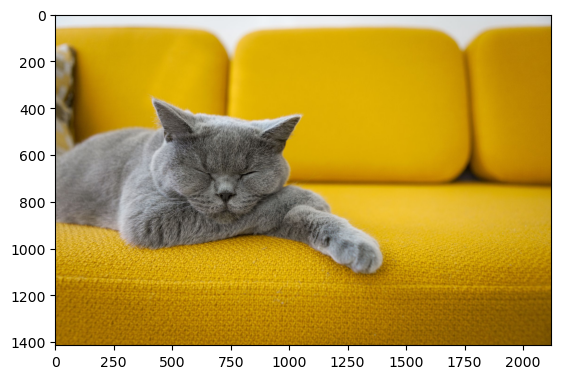

In [125]:
im1_rotate = img1.transpose(Image.FLIP_LEFT_RIGHT)
plt.imshow(im1_rotate)

In [133]:
imgcrop = im1_rotate.crop((100, 400, 1500, 1100))
#imgcrop.show()
#imgcrop.save("26656_RioSebastian_Question1_1.jpg")
draw = ImageDraw.Draw(imgcrop)
draw.ellipse((780, 130, 1370, 320), fill=(255,255,255,255))
draw.ellipse((800, 150, 1350, 300), fill=(255,255,0, 255))

font = ImageFont.truetype("Arial.ttf", 40) 
draw.text((900, 200), "Rio Sebastian - 26656", font=font, fill=(255, 0, 0, 0))

imgcrop.show()
imgcrop.save("26656_RioSebastian_Question1_2.jpg")


26656_RioSebastian_Question2

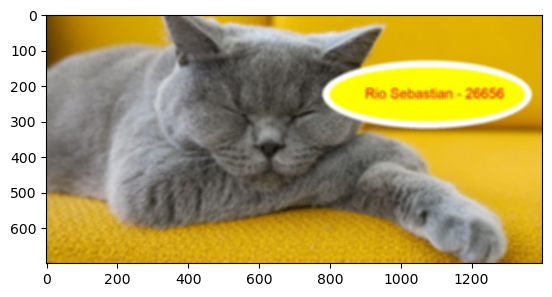

In [164]:
img2 = Image.open("26656_RioSebastian_Question1_2.jpg")
opencvImage = cv2.cvtColor(np.array(img2), cv2.COLOR_RGB2BGR)
blur = cv2.blur(opencvImage, (10, 10)) 
blur_rgb = cv2.cvtColor(blur, cv2.COLOR_BGR2RGB)
plt.imshow(blur_rgb)
plt.show()
Image.fromarray(blur_rgb).save("26656_RioSebastian_Question2_1.jpg")

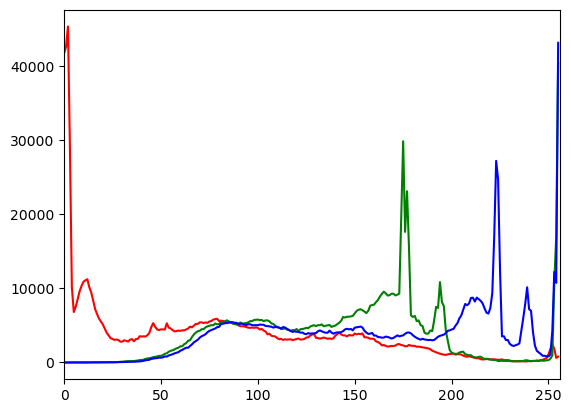

In [171]:
img2_result = Image.fromarray(blur)
color = ('r', 'g', 'b')
for i, col in enumerate(color):
    histr = cv2.calcHist([blur], [i], None, [256], [0, 256])
    plt.plot(histr, color=col)
    plt.xlim([0, 256])
plt.savefig("26656_RioSebastian_Question2_2.jpg")
plt.show()

26656_RioSebastian_Question3

2121 1414 RGB JPEG


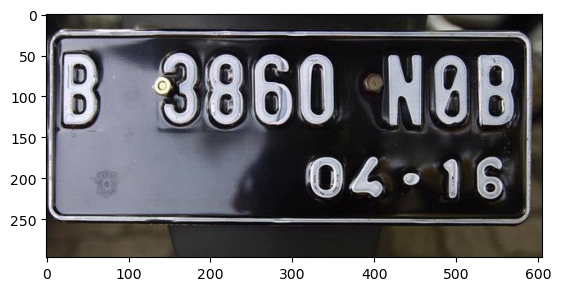

In [174]:
img5 = Image.open("midterm_3.jpeg")
plt.imshow(img5)
print (img1.width, img1.height, img1.mode, img1.format)

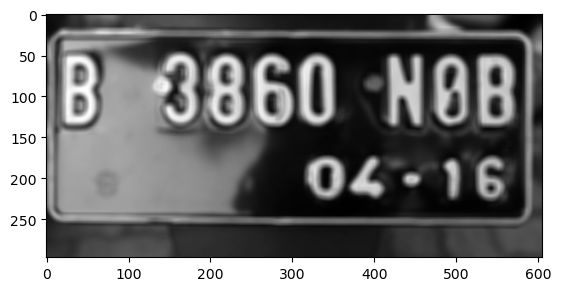

In [236]:
opencvImage = cv2.cvtColor(np.array(img5), cv2.COLOR_RGB2GRAY)
blur = cv2.blur(opencvImage,(8,8))
plt.imshow(blur, cmap = 'gray')

In [237]:
kernel = np.ones((4,4),np.uint8)
dilation = cv2.dilate(blur,kernel, iterations = 1)
opening = cv2.morphologyEx(blur, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(blur, cv2.MORPH_CLOSE, kernel)

(-0.5, 605.5, 296.5, -0.5)

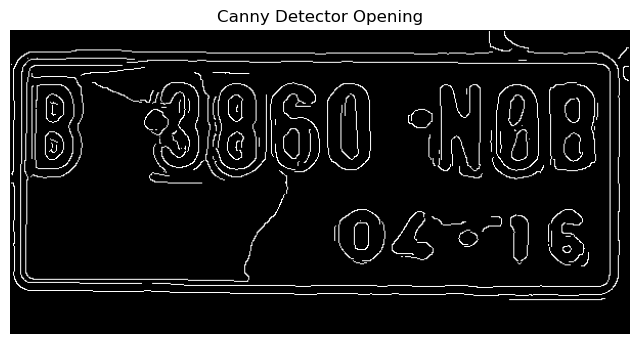

In [238]:
edgesopening = canny(opening)
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(edgesopening, cmap=plt.cm.gray)
ax.set_title('Canny Detector Opening')
ax.axis('off')

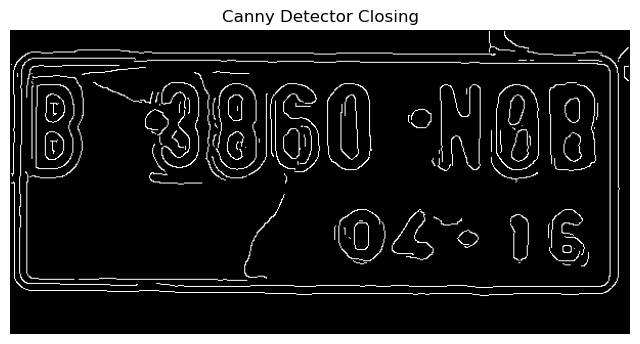

In [240]:
edgesclosing = canny(closing)

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(edgesclosing, cmap=plt.cm.gray)
ax.set_title('Canny Detector Closing')
ax.axis('off')
plt.savefig("26656_RioSebastian_Question3_1.jpg")
plt.show()

26656_RioSebastian_Question4

In [317]:
img = cv2.imread('midterm_4.jpeg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)


In [318]:
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)


In [319]:
sure_bg = cv2.dilate(opening,kernel,iterations=3)

In [320]:
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

In [321]:
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
ret, markers = cv2.connectedComponents(sure_fg)


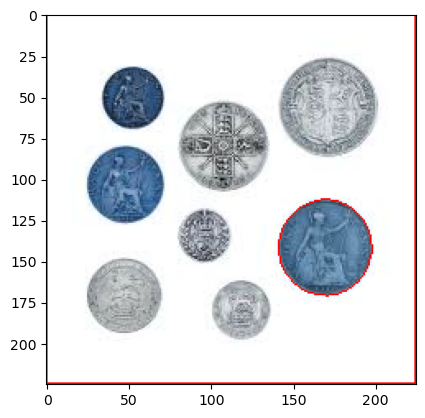

In [322]:
markers = markers+1
markers[unknown==255] = 0

markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

plt.imshow(img)
plt.show()

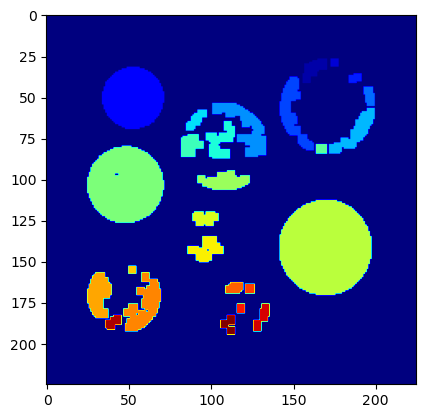

In [324]:
ret, markers = cv2.connectedComponents(opening)
markers = markers+1
markers[unknown==100] = 0
plt.imshow(markers,cmap=plt.cm.jet)
plt.savefig("26656_RioSebastian_Question4_1.jpg")